# Data Analysis on Football Players

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('players_20.csv')

## First Five entries of Data

In [5]:
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


## Features

In [13]:
for i in df.columns:
    print(i)

sofifa_id
player_url
short_name
long_name
age
dob
height_cm
weight_kg
nationality
club
overall
potential
value_eur
wage_eur
player_positions
preferred_foot
international_reputation
weak_foot
skill_moves
work_rate
body_type
real_face
release_clause_eur
player_tags
team_position
team_jersey_number
loaned_from
joined
contract_valid_until
nation_position
nation_jersey_number
pace
shooting
passing
dribbling
defending
physic
gk_diving
gk_handling
gk_kicking
gk_reflexes
gk_speed
gk_positioning
player_traits
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties
mentality_composure
defe

#### Dimensions of DataFrame

In [16]:
df.shape

(18278, 104)

In [21]:
df.short_name.count()

18278

In [51]:
df.groupby(df.nationality)['short_name'].count().sort_values(ascending=False)

nationality
England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
               ... 
Malawi            1
Mauritius         1
St Lucia          1
South Sudan       1
Jordan            1
Name: short_name, Length: 162, dtype: int64

#### Conclusion: Most Players are from England

In [333]:
x=df.groupby(df.nationality)['short_name'].count().sort_values(ascending=False).head(10)
print(x)
x=list(x.index)
print(x)

nationality
England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
Brazil          824
Italy           732
Colombia        591
Japan           453
Netherlands     416
Name: short_name, dtype: int64
['England', 'Germany', 'Spain', 'France', 'Argentina', 'Brazil', 'Italy', 'Colombia', 'Japan', 'Netherlands']


In [331]:
y=df.groupby(df.nationality)['short_name'].count().sort_values(ascending=False)
y=list(y.head(10))
print(y)

[1667, 1216, 1035, 984, 886, 824, 732, 591, 453, 416]


## Countrywise Player Distribution

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'England'),
  Text(1, 0, 'Germany'),
  Text(2, 0, 'Spain'),
  Text(3, 0, 'France'),
  Text(4, 0, 'Argentina'),
  Text(5, 0, 'Brazil'),
  Text(6, 0, 'Italy'),
  Text(7, 0, 'Colombia'),
  Text(8, 0, 'Japan'),
  Text(9, 0, 'Netherlands')])

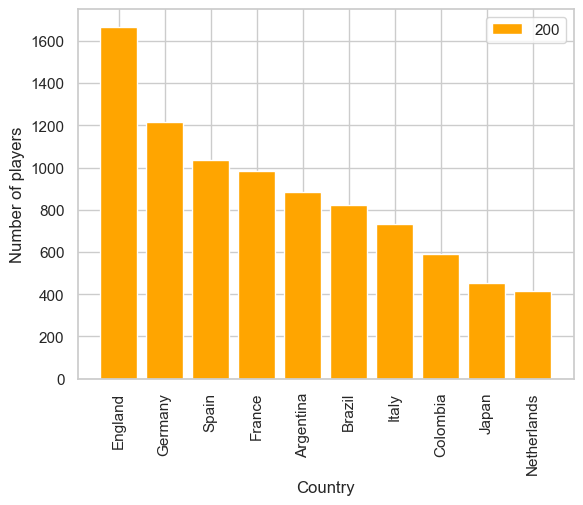

In [337]:
plt.bar(x,y,color='orange')
plt.legend([200])
plt.ylabel('Number of players')
plt.xlabel('Country')
plt.xticks(rotation='vertical')

#### All Different Positions that Players play in Field

In [107]:
df.nation_position.unique()

array([nan, 'LS', 'LW', 'GK', 'LF', 'RCM', 'SUB', 'LCB', 'RW', 'RM', 'ST',
       'LDM', 'RCB', 'CDM', 'CAM', 'CF', 'RDM', 'RF', 'LB', 'LCM', 'LM',
       'RB', 'CB', 'CM', 'RS', 'RWB', 'LWB'], dtype=object)

In [163]:
sd=df[(df.nation_position=='LS') |
   (df.nation_position=='LW') |
   (df.nation_position=='LF') |
   (df.nation_position=='RW') |
   (df.nation_position=='ST') |
   (df.nation_position=='CF') |
   (df.nation_position=='RF') |
   (df.nation_position=='RS')
  ].groupby('nationality').count()
sd=sd.iloc[:,2]
sd=sd.sort_values(ascending=False)
print(sd)

nationality
Italy                  3
Colombia               3
Mexico                 3
New Zealand            3
Northern Ireland       3
Germany                3
England                3
Egypt                  3
Republic of Ireland    3
Denmark                3
Ivory Coast            3
South Africa           3
China PR               3
Chile                  3
Spain                  3
Cameroon               3
Brazil                 3
Belgium                3
United States          3
Australia              3
Switzerland            2
Portugal               2
Poland                 2
Norway                 2
Turkey                 2
Argentina              2
Ecuador                2
India                  1
Scotland               1
Venezuela              1
Uruguay                1
Austria                1
Bolivia                1
Bulgaria               1
Sweden                 1
Canada                 1
Czech Republic         1
Slovenia               1
Russia                 1
Netherlands  

#### Conclusion: Max Number of forwards used by any country is 3

In [162]:
sd=df[(df.nation_position=='LDM') |
   (df.nation_position=='CAM') |
   (df.nation_position=='RDM') |
   (df.nation_position=='LCM') |
   (df.nation_position=='LM') |
   (df.nation_position=='CDM') |
   (df.nation_position=='RCM') |
   (df.nation_position=='RM')
  ].groupby('nationality').count()
sd=sd.iloc[:,2]
sd=sd.sort_values(ascending=False)
print(sd)

nationality
Wales                  5
Czech Republic         5
Paraguay               5
India                  5
Iceland                5
Hungary                5
Greece                 5
Peru                   5
France                 5
Finland                5
Romania                5
Netherlands            5
Scotland               5
Slovenia               5
Sweden                 5
Switzerland            5
Canada                 5
Bulgaria               5
Uruguay                5
Bolivia                5
Venezuela              5
Austria                5
Russia                 4
Portugal               4
Turkey                 4
Norway                 4
Argentina              4
Belgium                4
Ecuador                4
Mexico                 3
Colombia               3
Brazil                 3
United States          3
Cameroon               3
Chile                  3
China PR               3
Spain                  3
South Africa           3
Denmark                3
New Zealand  

##### Conclusion: Max Number of midfielders used by any country is 5

In [170]:
defender_d=df[(df.nation_position=='LCB') |
   (df.nation_position=='LB') |
   (df.nation_position=='RB') |
   (df.nation_position=='RCB') |
   (df.nation_position=='CB') |
   (df.nation_position=='LWB') |
   (df.nation_position=='RWB')].groupby('nationality').count()
defender_d=defender_d.iloc[:,2]
defender_d=defender_d.sort_values(ascending=False)
print(defender_d)

nationality
Russia                 5
Argentina              4
Republic of Ireland    4
Mexico                 4
Netherlands            4
New Zealand            4
Northern Ireland       4
Norway                 4
Paraguay               4
Peru                   4
Poland                 4
Portugal               4
Romania                4
Australia              4
Scotland               4
Slovenia               4
South Africa           4
Spain                  4
Sweden                 4
Turkey                 4
United States          4
Uruguay                4
Venezuela              4
Ivory Coast            4
Italy                  4
India                  4
Czech Republic         4
Austria                4
Bolivia                4
Brazil                 4
Bulgaria               4
Cameroon               4
Canada                 4
Chile                  4
China PR               4
Iceland                4
Colombia               4
Denmark                4
Ecuador                4
Egypt        

#### Only Russia has 5 defenders others rely on 4

## Players with Highest dribbling Skills

In [202]:
dribble=df.loc[:,['short_name','dribbling','nationality']]
dribble=dribble.dropna()
dribble=dribble.sort_values(by='dribbling',ascending=False)
dribble=dribble.head(10)

In [203]:
dribble.index=[1,2,3,4,5,6,7,8,9,10]
dribble

,short_name,dribbling,nationality
1,L. Messi,96.0,Argentina
2,Neymar Jr,95.0,Brazil
3,E. Hazard,94.0,Belgium
4,Bernardo Silva,92.0,Portugal
5,Douglas Costa,91.0,Brazil
6,Isco,91.0,Spain
7,D. Mertens,91.0,Belgium
8,L. Insigne,91.0,Italy
9,P. Dybala,90.0,Argentina
10,M. Verratti,90.0,Italy


In [204]:
x=dribble.short_name
y=dribble.dribbling

Text(0.5, 0, 'Players')

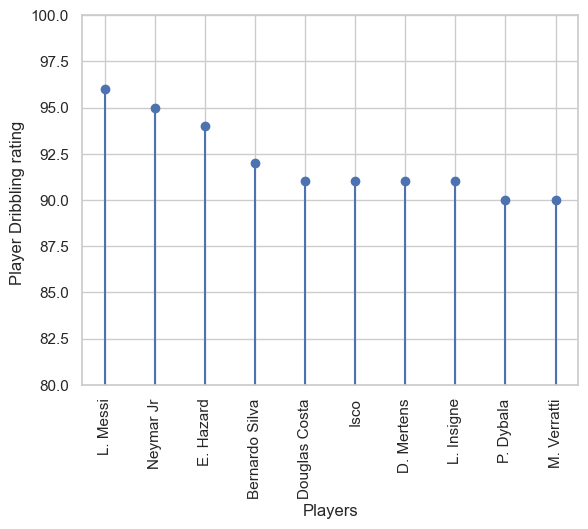

In [233]:
plt.stem(x,y)
plt.xticks(rotation='vertical')
plt.ylim(80,100)
plt.ylabel('Player Dribbling rating ')
plt.xlabel('Players')

## Players having highest market values

In [238]:
player_value=df.loc[:,['short_name','value_eur','club']].sort_values(by='value_eur',ascending=False)
player_value=player_value.head(5)
player_value

,short_name,value_eur,club
2,Neymar Jr,105500000,Paris Saint-Germain
0,L. Messi,95500000,FC Barcelona
10,K. Mbappé,93500000,Paris Saint-Germain
5,K. De Bruyne,90000000,Manchester City
4,E. Hazard,90000000,Real Madrid


Text(0, 0.5, 'Value in Euros')

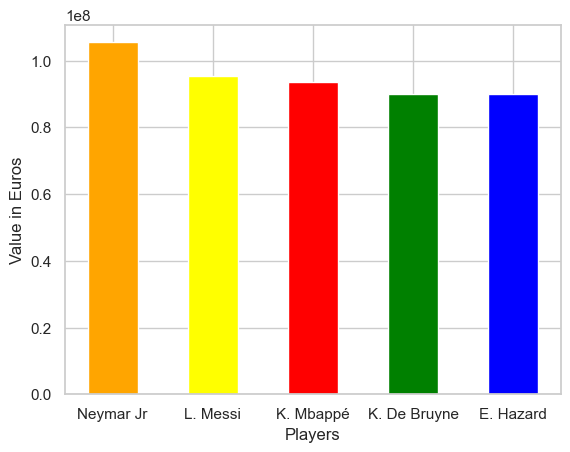

In [242]:
plt.bar(player_value.short_name,player_value.value_eur,width=0.5,color=['orange','yellow','red','green','blue'])
plt.xlabel('Players')
plt.ylabel('Value in Euros')

## Top 5 Players having highest wage in Euro  

In [255]:
p_salary=df[['short_name','wage_eur']]
p_salary=p_salary.sort_values(by='wage_eur',ascending=False)
p_salary=p_salary.head()
print(p_salary)

           short_name  wage_eur
0            L. Messi    565000
4           E. Hazard    470000
1   Cristiano Ronaldo    405000
5        K. De Bruyne    370000
22       A. Griezmann    370000


In [283]:
age_d=df.age
age_d=age_d.value_counts().sort_index()
age_d

age
16      12
17     229
18     640
19    1011
20    1247
21    1375
22    1446
23    1358
24    1296
25    1319
26    1270
27    1324
28    1086
29     999
30     883
31     807
32     597
33     475
34     301
35     310
36     131
37      81
38      42
39      20
40      13
41       4
42       2
Name: count, dtype: int64

In [303]:
print('age=', age_d.idxmax(), ', count=', age_d.max())  ## max people of 22 yrs of age play

age= 22 , count= 1446


## Age Distribution

Text(0.5, 0, 'Age')

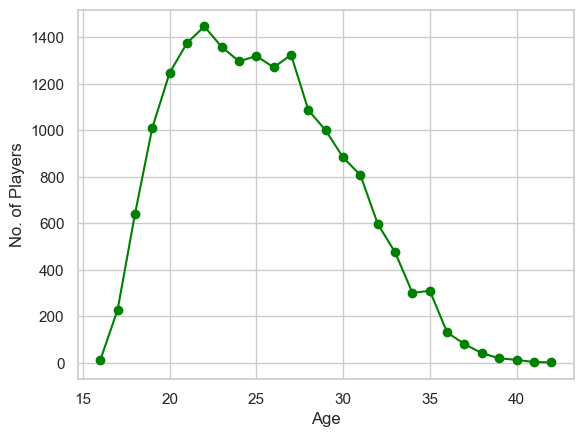

In [307]:
plt.plot(age_d.index,list(age_d),'o-',color='green')
plt.ylabel('No. of Players')
plt.xlabel('Age')

## Top Players According to OVR

In [317]:
ovr=df[['short_name','overall']].sort_values(by='overall',ascending=False)
ovr.head()

,short_name,overall
0,L. Messi,94
1,Cristiano Ronaldo,93
2,Neymar Jr,92
3,J. Oblak,91
4,E. Hazard,91


## Tallest Players

In [323]:
hgts=df[['short_name','height_cm','nationality']]
hgts.sort_values(by='height_cm',ascending=False).head()

,short_name,height_cm,nationality
9208,T. Holý,205,Czech Republic
8200,A. Ba,203,Mauritania
12808,A. Chapman,203,England
3121,C. Pantilimon,203,Romania
12864,M. Qvist,203,Denmark
